Analyzing Action Potentials in Axons
====================================

This script shows how to use the methods of ``axon_results``-class to detect and analyze action potentials.

Number of APs detected: 5
APs reached end: False
APs reached end within the timeframe: True
InterAP collision detected: True
AP propagation velocity: 55.758m/s


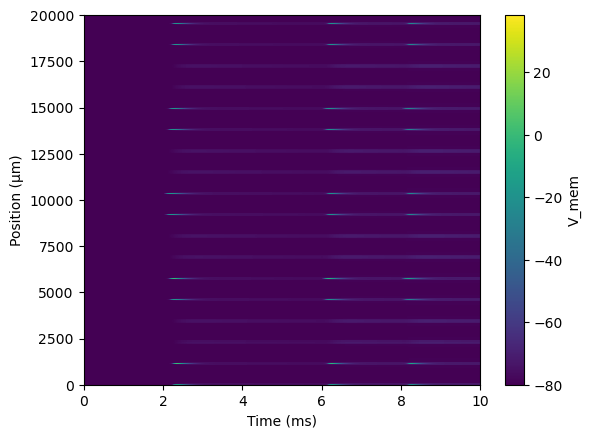

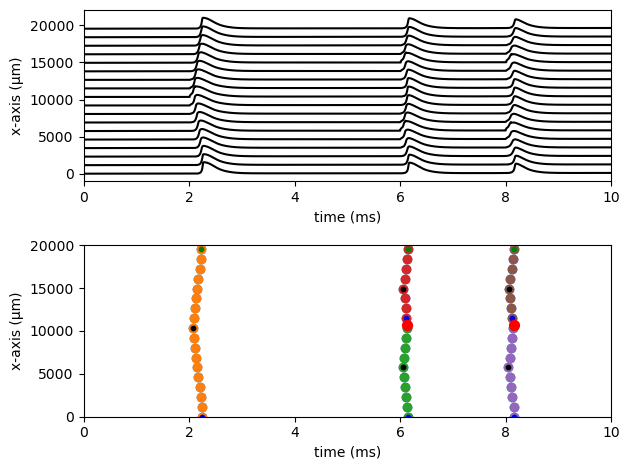

In [2]:
import sys
sys.path.append("../../../")

import nrv
import matplotlib.pyplot as plt

y = 0
z = 0
d = 10
L = 20000
#with AP collision
axon2 = nrv.myelinated(y,z,d,L,dt=0.005,rec='all')
t_start = 2
duration = 0.1
amplitude = 2

axon2.insert_I_Clamp(0.5, 2.01, duration, amplitude)
axon2.insert_I_Clamp(0.75, 6.01, duration, amplitude)
axon2.insert_I_Clamp(0.25, 6.0, duration, amplitude)
axon2.insert_I_Clamp(0.75, 8.01, duration, amplitude)
axon2.insert_I_Clamp(0.25, 8.0, duration, amplitude)
results = axon2.simulate(t_sim=10)

results.rasterize()
x_APs,_,t_APs,_ = results.split_APs()

print(f"Number of APs detected: {results.count_APs()}")
print(f"APs reached end: {results.APs_reached_end()}")
print(f"APs reached end within the timeframe: {results.APs_in_timeframe()}")
print(f"InterAP collision detected: {results.detect_AP_collisions()}")
if (results.count_APs()):
    print(f"AP propagation velocity: {results.getAPspeed()[0]}m/s")

fig,ax = plt.subplots(1)
results.colormap_plot(ax)

fig,axs = plt.subplots(2)

results.plot_x_t(axs[0],"V_mem")
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel("x-axis (µm)")
axs[0].set_xlim(0,results['tstop'])

results.raster_plot(axs[1],"V_mem")
for x_AP,t_AP in zip(x_APs,t_APs):
    axs[1].scatter(t_AP,x_AP)
    x_start,t_start = results.get_start_AP(x_AP,t_AP)
    x_max,t_xmax = results.get_xmax_AP(x_AP,t_AP)
    x_min,t_xmin = results.get_xmin_AP(x_AP,t_AP)
    axs[1].scatter(t_start,x_start,s=10,c = 'k')
    axs[1].scatter(t_xmax,x_max,s=10,c = 'g')
    axs[1].scatter(t_xmin,x_min,s=10,c = 'b')

if results.detect_AP_collisions():
    x_coll,t_coll,_ = results.get_collision_pts()
    axs[1].scatter(t_coll,x_coll,s=50,c = 'r')

axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel("x-axis (µm)")
axs[1].set_xlim(0,results['tstop'])

fig.tight_layout()

Same thing but with an unmyelinated fiber

Number of APs detected: 3
APs reached end: False
APs reached end within the timeframe: True
InterAP collision detected: True
AP propagation velocity: 0.416m/s


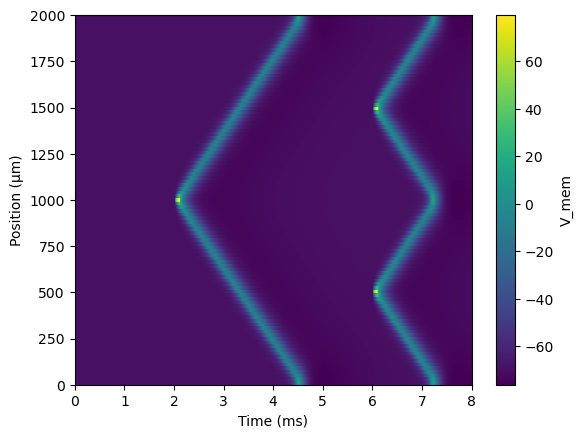

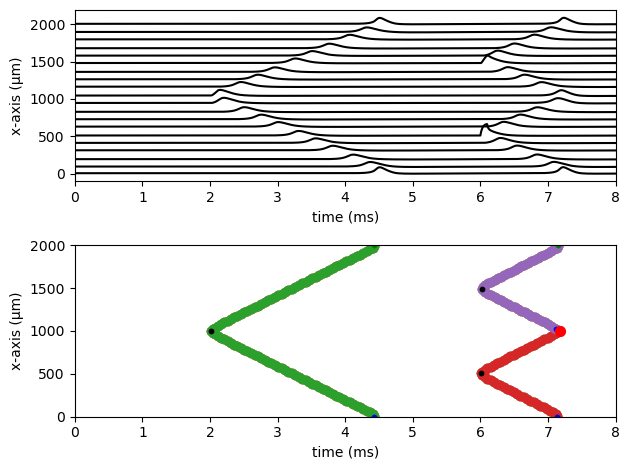

In [3]:
y = 0
z = 0
d = 0.5
L = 2000

axon2 = nrv.unmyelinated(y,z,d,L,dt=0.005,rec='all')
t_start = 2
duration = 0.1
amplitude = 2

axon2.insert_I_Clamp(0.5, 2.01, duration, amplitude)
axon2.insert_I_Clamp(0.75, 6.01, duration, amplitude)
axon2.insert_I_Clamp(0.25, 6.0, duration, amplitude)
results = axon2.simulate(t_sim=8)

results.rasterize()
x_APs,_,t_APs,_ = results.split_APs()
print(f"Number of APs detected: {results.count_APs()}")
print(f"APs reached end: {results.APs_reached_end()}")
print(f"APs reached end within the timeframe: {results.APs_in_timeframe()}")
print(f"InterAP collision detected: {results.detect_AP_collisions()}")
if (results.count_APs()):
    print(f"AP propagation velocity: {results.getAPspeed()[0]}m/s")

fig,ax = plt.subplots(1)
results.colormap_plot(ax)

fig,axs = plt.subplots(2)

results.raster_plot(axs[1],"V_mem")

results.plot_x_t(axs[0],"V_mem")
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel("x-axis (µm)")
axs[0].set_xlim(0,results['tstop'])

results.raster_plot(axs[1],"V_mem")
for x_AP,t_AP in zip(x_APs,t_APs):
    axs[1].scatter(t_AP,x_AP)
    x_start,t_start = results.get_start_AP(x_AP,t_AP)
    x_max,t_xmax = results.get_xmax_AP(x_AP,t_AP)
    x_min,t_xmin = results.get_xmin_AP(x_AP,t_AP)
    axs[1].scatter(t_start,x_start,s=10,c = 'k')
    axs[1].scatter(t_xmax,x_max,s=10,c = 'g')
    axs[1].scatter(t_xmin,x_min,s=10,c = 'b')

if results.detect_AP_collisions():
    x_coll,t_coll,_ = results.get_collision_pts()
    axs[1].scatter(t_coll,x_coll,s=50,c = 'r')

axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel("x-axis (µm)")
axs[1].set_xlim(0,results['tstop'])
fig.tight_layout()

#plt.show()